### Face Recognition
Face recognition task is based on one-shot learning.

This can be done by calculating the distance between image of a id card and the upcomming person's face using siamese network.

#### Triplet Loss 
using Anchor, Positive, Negative images

Anchor and Positive images are the same person and the Negative is not. For the actual training, it is better to select a similar person rather than selecting randomly.

$$
\begin{align*}
\mathbf{z}_A &:= \text{anchor image latent}\\
\mathbf{z}_P &:= \text{positive image latent}\\
\mathbf{z}_N &:= \text{negative image latent}\\
\end{align*}
$$

$$
\delta := \text{margin}\\

\begin{align*}
||\mathbf z_A - \mathbf z_P||^2 \leq ||\mathbf z_A - \mathbf z_N||^2 \\
||\mathbf z_A - \mathbf z_P||^2 + \delta \leq ||\mathbf z_A - \mathbf z_N||^2 \\
||\mathbf z_A - \mathbf z_P||^2 - ||\mathbf z_A - \mathbf z_N||^2 + \delta \leq 0 \\
\end{align*}
$$

Triplet loss \
$
\mathcal{L}(\mathbf z_A, \mathbf z_P, \mathbf z_N) =
\max(||\mathbf z_A - \mathbf z_P||^2 - ||\mathbf z_A - \mathbf z_N||^2 + \delta, 0)
$

<img src="src/triplet.png" height="200px" />

BCE loss \
$
\hat{y} =
\sigma(\mathbf w \cdot |\mathbf z_1 - \mathbf z_2| + b)
$\
$
\hat{y} =
\sigma(\mathbf w \cdot \frac{(\mathbf z_1 - \mathbf z_2)^2}{\mathbf z_1 + \mathbf z_2} + b)
$ chi-squared distance

<img src="src/bce.png" height="200px" />


### Neural Style Transfer

As the layer propagates, the larger patches of an image is seen, meaning that more complex pattern is detected.

<img src="src/layers.png" width="1000px" />

<img src="src/styletransfer.png" height="300px" />

(C)ontent + (S)tyle = (G)enerated 

The cost function to evaluate how well $G$ is generated is:\
how similar the content is ($J_{\text{content}}$) and how similar the style is ($J_{\text{style}}$)

$$
J(G) = \alpha \cdot J_{\text{content}}(C, G) + \beta \cdot J_{\text{style}}(S, G) 
$$

Here are the steps:

1. Initiate $G$ randomly\
`G = torch.randn(3,224,224)`
1. Use gradient descent to minimize $J(G)$\
$G := G - \dfrac{\partial}{\partial G}J(G)$

We use a pretrained ConvNets sth like VGG.

#### Cost function $J_{\text{content}}$

Let $a^{[l](C)}$ and $a^{[l](G)}$ be the activation of layer $l$ in a network.\
If $a^{[l](C)} \sim a^{[l](G)}$, then both $C$, $G$ have similar content.

$J_{\text{content}}(C, G) = \dfrac{1}{2} ||a^{[l](C)} - a^{[l](G)}||^2$

#### Cost function $J_{\text{style}}$

<img src="src/stylecorrelation.png" width="1000px" />

What does a style mean in ConvNets?

Each channel in a layer detects a pattern (vertical line pattern, orange like color etc.).\
If pattern A and B occur together more often this can be called as a *style*, which can be told with a *pattern correlation*.\
Occuring together or not together are both meaningful style.

$J_{\text{style}}(S, G) = \dfrac{1}{2} ||a^{[l](C)} - a^{[l](G)}||^2$

tensor([[[-0.0278, -0.4696],
         [-0.2247,  0.1239]],

        [[-0.6815,  0.6262],
         [-0.8127,  0.7374]],

        [[-1.0493,  1.2273],
         [ 0.5256, -1.2139]],

        [[ 0.3935,  0.4168],
         [-1.0679, -0.0406]],

        [[ 0.0612, -0.6268],
         [ 0.8969,  0.0478]]])


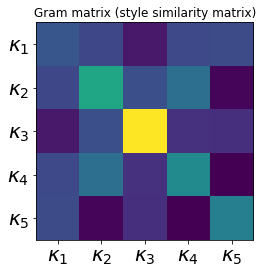

In [1]:
# Gram matrix = Style similarity matrix
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

a = torch.randn(5,2,2) # image after activation; channel of 5, kernel size of (2,2)
print(a)

G = a.view(5, -1) @ a.view(5, -1).T # Gram matrix

fig, ax = plt.subplots()
ax.set_title('Gram matrix (style similarity matrix)')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.imshow(G)
ax.set_xticks(range(5), [rf"$\kappa_{i}$" for i in range(1, 6)])
ax.set_yticks(range(5), [rf"$\kappa_{i}$" for i in range(1, 6)])
plt.show()

$\mathcal G$ for Gram matrix

$$
\mathcal{G}_{\kappa \kappa'}^{[l](G)} = \sum_{i=1}^{n_H} \sum_{i=1}^{n_W} a_{i,j,\kappa}^{[l](G)} a_{i,j,\kappa'}^{[l](G)}
$$
$$
J_{\text{style}}^{[l]}(S,G) =
\dfrac{1}{(2 n_H^{[l]} n_W^{[l]} n_C^{[l]})^2} \sum_{\kappa, \kappa'}(\mathcal G_{\kappa\kappa'}^{[l](S)} - \mathcal G_{\kappa\kappa'}^{[l](G)})^2
$$
$$
J_{\text{style}}(S,G) =
\sum_{l} \lambda^{[l]} J_{\text{style}}^{[l]}(S, G)
$$

In [2]:
a_style = torch.randn(5,2,2) # image after activation; channel of 5, kernel size of (2,2)
a_generated = torch.randn(5,2,2) # image after activation; channel of 5, kernel size of (2,2)

G_style = a_style.view(5, -1) @ a_style.view(5, -1).T # Gram matrix of a style image latent after activation function
G_generated = a_generated.view(5, -1) @ a_generated.view(5, -1).T # Gram matrix of a generated image latent after activation function

J = (1/(2*2*2*5))**2*((G_style - G_generated)**2).sum().sqrt()
print(J)

tensor(0.0073)
